# Introdução ao Machine Learning: Convergência de Um Perceptron

**Geração dos Dados em formato de meia-lua** 

In [1]:
from sklearn.datasets import make_moons 
x, y = make_moons(n_samples = 2000, noise=0.15, random_state=42)
x.shape, y.shape

((2000, 2), (2000,))

Dataframe para os dados de desenho

In [0]:
import numpy as np
np.set_printoptions(precision=3)
uns = np.ones(len(y)).reshape(-1,1)

import pandas as pd
dados = pd.DataFrame(data = np.concatenate([uns,x,y.reshape(-1,1)], axis=1), 
                     columns=['x0','x1','x2','y'])

Deslocamento de x2 para baixo e x1 para a direita (no grupo em que y=1), para permitir a separação linear entre os grupos seguido de um giro de 45o para criar uma reta inclinada de separação. 

In [0]:
dados['x2_desloc'] = np.array(dados['x2'] - 2.00 * dados['y'])
dados['x1_desloc'] = np.array(dados['x1'] + 0.25 * dados['y'])

graus = 45
rads = graus*np.pi/180

Mgiro = np.array([[np.cos(rads), np.sin(rads)],
                  [-np.sin(rads),np.cos(rads)]])

vetores = np.array(dados[['x1_desloc','x2_desloc']])
vetores_novos = np.matmul(Mgiro,vetores.T).T

dados['x1_giro'] = vetores_novos[:,0]
dados['x2_giro'] = vetores_novos[:,1]

Setup da matplotlib e gráfico de dispersão gerado pela seaborn.

Reta de separação $y=-(a + b.$ ```x1_giro```$)/c$ produzida com parâmetros $a$, $b$ e $c$ escolhidos ao acaso.

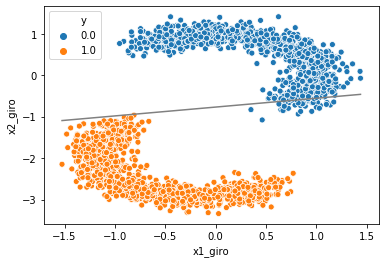

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

np.random.seed(42)
a, b, c = np.random.randn(3)
sns.lineplot(data=dados, x='x1_giro', y=-(a+b*dados['x1_giro'])/c, color='gray');
sns.scatterplot(data=dados, x='x1_giro', y='x2_giro', hue='y');

In [0]:
plt.close()

**Função de Treino do Perceptron.**

O objetivo é encontrar uma reta que separe os dois grupos. Neste caso vamos definir uma reta como o conjunto de pontos $(x_1, x_2)$ para os quais $a + b.x_1 + c.x_2 = 0$. Iniciamos o processo escolhendo ao acaso três valores, $a$, $b$ e $c$. Chamemos o valor $ a + b.x_1 + c.x_2 $ de $teste$. O critério de separação será: para $ teste > 0$ teremos $y_{hat} = 1$ e para $teste < 0$ teremos $y_{hat} = 0$.  

---    
Se $y_{hat}=0$ e $y=1$, isto significa que $teste$ deu um valor menor do que deveria ter dado. Sendo assim ajustamos $a$, $b$ e $c$ para maior fazendo $ [a, b, c] = [a, b, c] + eta.[1, x_1, x_2]$ onde $eta$ é a taxa de aprendizado (neste caso $eta=0.1$).

---
Se $y_{hat}=1$ e $y=0$, isto significa que $teste$ deu um valor maior do que deveria ter dado. Sendo assim ajustamos $a$, $b$ e $c$ para menor fazendo $ [a, b, c] = [a, b, c] - eta.[1, x_1, x_2]$ onde $eta$ é a taxa de aprendizado (neste caso $eta=0.1$).

---
O processo acima é repetido para todos os pares de pontos $x_1, x_2$ quando então diz-se ter completado uma época de treino. Repete-se este processo por um número definido de épocas, o qual neste exemplo foi escolhido como 1.000 ou até que a precisão dos valores previstos $y_{hat}$ tenha atingido 100% (quando todos os valores de $y_{hat}$ irão concordar com os valores de $y$.)

---
Observação: dado que a reta é atualizada a cada iteração com X[i], esta lógica de ajuste não pode ser implementada através de uma operação matricial única. Devemos obrigatoriamente percorrer a matriz vetor por vetor e ir ajustando a reta passo a passo.

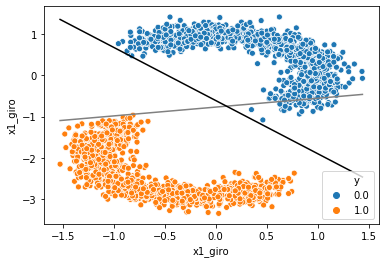

In [6]:
np.random.seed(42)
reta = np.random.randn(1,3)
historico = np.copy(reta)

X = np.array(dados.loc[:,['x0','x1_giro','x2_giro']])
Y = np.array(dados.loc[:,['y']])

for epoca in range(1000):
  for i in range(len(dados)):
    teste = np.sum(reta*X[i])
    Y_hat = (teste>0)*1
    sinal = Y[i] - Y_hat
    reta = reta + 0.01 * sinal*X[i]
    historico = np.append(historico, reta, axis=0)
  Y_hat = (X.dot(reta.T)>0)*1
  precisao = np.mean(Y_hat==Y)
  if precisao == 1:
    break

sns.scatterplot(data = dados, x = 'x1_giro', y = 'x2_giro', hue='y');
[a,b,c] = historico[0] # reta inicial
sns.lineplot(data = dados, x = 'x1_giro', y = -(a + b*dados['x1_giro'])/c, color='gray');
[a,b,c] = historico[-1] # reta final
sns.lineplot(data = dados, x = 'x1_giro', y = -(a + b*dados['x1_giro'])/c, color='black');

In [0]:
plt.close()

Evolução da Linha de Separação ao longo das Épocas

In [8]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" #ou "jshtml"

xmin = dados['x1_giro'].min()-0.25; xmax = dados['x1_giro'].max()+0.25
ymin = dados['x2_giro'].min()-0.25; ymax = dados['x2_giro'].max()+0.25
n = len(historico)-1; 
n_quadros = 100

plt.close()
fig, ax1 = plt.subplots(1,1,figsize=(6,4))

def faz_linha(k, historico = historico, dados = dados, ax1=ax1,
              xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, n=n,
              n_quadros=n_quadros):    
    ax1.cla()
    i = int((k+1)*n/n_quadros); 
    ax1.set_title('Convergência do Perceptron - i = ' + str(i) + " de " + str(n))

    sns.scatterplot(data=dados, x='x1_giro', y='x2_giro', hue='y', ax=ax1)
    ax1.set_xlim([xmin, xmax]); ax1.set_ylim([ymin, ymax])
    
    [a,b,c] = historico[i]
    reta = -(a + b * dados['x1_giro']) / c
    sns.lineplot(data=dados, x='x1_giro', y=reta, color='black', ax=ax1)
    return(ax1)

animacao = FuncAnimation(fig, faz_linha, n_quadros, repeat = False, interval = 400)
plt.close()
animacao

In [0]:
plt.close()

# Desenvolvimento de uma rede neural from scratch a partir do numpy

O objetivo desta sequência do curso é desenvolver um programa capaz de criar uma rede neural a partir de uma especificação de sua estrutura. 
A especificação conterá para cada camada: o número de entradas, o número de saidas e a função de ativação dos neurônios.
A partir desta estrutura o programa será treinado e irá realizar previsões. Esta estrutura será desenvolvida apenas com o pacote numpy.

O pacote sys e a função cria_planilha foram utilizados apenas na etapa de desenvolvimento (para debug).
Utilizaremos a função sys.exit() para parar o programa em algum ponto desejado. A função cria_planilha salva uma matriz do python no formato .xlsx

In [0]:
import sys

ARQUIVO = "resultado.xlsx"

def cria_planilha(matriz, planilha, arquivo=ARQUIVO):
    import pandas as pd
    from openpyxl import load_workbook
    if not os.path.isfile(arquivo):
        writer = pd.ExcelWriter(arquivo, engine="openpyxl")
    else:
        book = load_workbook(arquivo)
        writer = pd.ExcelWriter(arquivo, engine="openpyxl")
        writer.book = book
        
    a = pd.DataFrame(matriz)
    a.to_excel(writer, sheet_name=planilha)
    writer.save()
    writer.close()


As funções a seguir devem ser utilizadas dependendo do sistema operacional. O Google Colab utiliza o Linux. Estas funções servem para escolher o diretório de trabalho no Google Colab. Além disso serão carregados pacotes de cálculo

In [14]:
import os
import platform
sistema = platform.system()

if sistema == 'Linux':
    from google.colab import drive
    drive.mount("/content/drive/")
    os.chdir("/content/drive/My Drive/Colab Notebooks/machine_learning/")
else:
    os.chdir("C:\\Users\\gusta\\Google Drive\\Colab Notebooks\\machine_learning")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Nas próximas células temos o acerto dos parâmetros e o carregamento de bibliotecas do programa

In [0]:
import numpy as np
from numpy.random import random as rnd
np.set_printoptions(precision=3)
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import copy
epocas = 5000
suav = 0.1
alpha = 0.2
m = 5500
borda = 0.1
n_grid = 40
semente=42
frames = 100

A célula a seguir gera o conjunto de dados de trabalho (dois circulos concentricos). Como a função make_circles gera os dados como matrizes coluna, precisamos transforma-los em matrizes linha (tal como requerido pela rede neural).

In [0]:
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=m, shuffle=True, 
                    noise=0.1, factor=0.4,
                    random_state=semente)
X = X.T
Y = Y.reshape(1,-1)

A seguir geramos as funções de ativação da rede neural

In [0]:
relu = lambda x: (x>0)*x
drelu = lambda x: (x>0)*1
sig = lambda x: 1/(1+np.exp(-x))
dsig = lambda x: sig(x)*(1-sig(x))    

A próxima etapa envolve a criação da estrutura da rede no formato descrito a seguir. 

In [0]:
estrutura = [{'in':2, 'out':25, 'ativ':relu},
             {'in':25,'out':50, 'ativ':relu},
             {'in':50,'out':50, 'ativ':relu},
             {'in':50,'out':25, 'ativ':relu},
             {'in':25,'out': 1, 'ativ':sig}]

niveis = len(estrutura)

Em seguida temos a inicialização dos pesos e a inserção das derivadas das funções de ativação.

In [0]:
np.random.seed(semente)
for i,val in enumerate(estrutura):
    val['W'] = rnd(val['in']*val['out']).reshape(val['out'],val['in'])*suav
    val['b'] = rnd(val['out']).reshape(val['out'],1)*suav
    if val['ativ']==relu:
        val['dativ']=drelu
    else:
        val['dativ']=dsig

Vamos agora treinar a rede. A etapa de treino envolve o forward pass, o cálculo do erro e o backward pass. A análise matemática da mesma é apresentada abaixo e na célula seguinte é desenvolvido o código correspondente.

A célula a seguir executa o treino da rede neural. Ela começa recebendo o vetor de entradas $\mathbf{\vec{X}}$, as matrizes de pesos $\mathbf{\vec{W}^t}$, os vetores de bias $\mathbf{\vec{b}}$ e as funções de ativação e devolverá os vetores de saida $\mathbf{\vec{Z}}$ e $\mathbf{\vec{A}}$. Em termos de notação matemática, supondo que o nível atual seja $L$ e o nível anterior $L-1$ teremos:   

$$\boldsymbol{Z}^{L} = \boldsymbol{W}^{L} \cdot \boldsymbol{A}^{L-1} + \boldsymbol{b}^{L}$$

$$\boldsymbol{A}^{L} = g^{L}(\boldsymbol{Z}^{L})$$

Após executar o *forward pass* é calculada a função de erro (Loss em inglês), a qual neste caso será a binary crossentropy. Na fórmula a seguir $ A $ é a função de ativação do último nível e $ Y $ são os valores observados da variável de saida, a qual neste exemplo será 0 ou 1. Isto ocorre pois temos apenas dois grupos para classificar os valores de entrada.

$$\boldsymbol{L} = -\frac{1}{m} \sum_{i = 1}^{m} ({Y}^{i}*log({A}^{i})+(1-Y^{i})*log(1-{A}^{i}))$$

Outro critério que poderia ter sido utilizado é o dos mínimos quadrados onde o erro seria :

$$\boldsymbol{L} = \frac{1}{2} \sum_{i = 1}^{m} { ( \hat{Y}^{i} - {Y}^{i} ) }^{2}$$

Para calcular a precisão precisamos de um critério para prever a classificação dos pontos (0 ou 1) a partir do valor contínuo da função de ativação ${A}^{L}$ do último nível. Neste caso faremos $\hat{Y} = 0$ se ${A}^{L}<=0.5$ e $\hat{Y} = 1$ no caso contrário (${A}^{L}>0.5$).

Desta forma a precisão será calculada como: $$\boldsymbol{P} = \frac{1}{m} \sum_{i = 1}^{m} (\hat{Y}^{i} == {Y}^{i} )$$ a qual é a média dos acertos produzidos pela rede neural.

Em seguida inicia-se a etapa backward na qual matrizes de peso serão ajustadas. O ajuste será calculado a partir de uma série de produtos de derivadas conforme será mostrado a seguir. Primeiro mostraremos como é feito o processo para trás (backward pass). A partir dos valores obtidos no backward pass serão calculados os ajustes de peso para as matrizes $W$ e $b$ de cada nível.

Partimos do último nível no qual $L=5$, e calculamos: $$  {dA}^{L} = \frac{\partial L }{\partial {A}^{L} }$$


Observe que ${dA}^{L}$ NÃO é a diferencial de ${A}^{L}$. ${dA}^{L}$ é apenas o nome da variável que escolhemos para representar a derivada do erro em relação aos valores da função de ativação do nível $l$. Na sequência abaixo os símbolos com $d$ minúsculo representam nomes de variáveis. Além disso $*$ significa que o produto foi feito elemento a elemento enquanto $.$ é um produto matricial.

Em seguida calculamos: $$ {dZ}^{L} = \frac{\partial L}{\partial {Z}^{L}} = \frac{\partial {A}^{L}}{\partial {Z}^{L}} * \frac{\partial {L}}{\partial {A}^{L}} $$

$${dZ}^{L} = \frac{\partial {A}^{L}}{\partial {Z}^{L}} * {dA}^{L}$$

Dado que $${Z}^{L} = {W}^{L} \cdot {A}^{L-1} + {b}^{L}$$

As regras de derivação matricial mostram que: $$ \frac{\partial {Z}^{L} }{\partial {W}^{L} } = {{A}^{L-1}}^{T} $$

Sendo assim: $${dW}^{L} = \frac{\partial L }{\partial {W}^{L}} = \frac{\partial {A}^{L}}{\partial {Z}^{L}} * \frac{\partial {L}}{\partial {A}^{L}}. \frac{\partial {Z}^{L} }{\partial {W}^{L} } = \frac{1}{m} {dZ}^{L} . {{A}^{L-1}}^{T}$$

Voltando para a expressão: $${Z}^{L} = {W}^{L} \cdot {A}^{L-1} + {b}^{L}$$

As regras de derivação mostram que: $$ \frac{\partial {Z}^{L} }{\partial {b}^{L} } = 1 $$

Sendo assim: $${db}^{L} = \frac{\partial L }{\partial {b}^{L}} = \frac{1}{m} \sum_{i = 1}^{m} {{dZ}^{L}}^{i}$$

Com isso podemos calcular os novos valores das matrizes de peso ($W$) e bias ($b$) através das fórmulas:

$$\mathbf{W}^{L}=\mathbf{W}^{L}-\alpha.d\mathbf{W}^{L}$$

$$\mathbf{b}^{L}=\mathbf{b}^{L}-\alpha.d\mathbf{b}^{L}$$

A sequência de derivadas pode então ser extendida para o nível $L-1$ fazendo-se:

$${dA}^{L-1} = \frac{\partial L }{\partial {A}^{L-1}} = \frac{\partial {Z}^{L} }{\partial {A}^{L-1}} . \frac{\partial {A}^{L}}{\partial {Z}^{L}} * \frac{\partial {L}}{\partial {A}^{L}} = {{W}^{L}}^{T} {dZ}^{[l]}$$

Lembrando uma vez que $${Z}^{L} = {W}^{L} \cdot {A}^{L-1} + {b}^{L}$$

As regras da derivação de produtos matriciais mostram: $$\frac{\partial {Z}^{L} }{\partial {A}^{L-1}} = {{W}^{L}}^{T}$$

Esta sequência agora está no nível $L-1$, neste caso o nível 4. Deve-se repetir os cálculos até serem obtidos os novos valores das matrizes de peso do nível 1, quando o backward pass termina e um novo forward pass deve ser executado.

O processo completo envolve executar as operações descritas acima várias vezes até ser atingida uma convergência de dados adequada. Cada vez que as etapas acima são executadas chamamos de *época*. 

In [20]:
import copy
memoria = []
memoria_epoca = []
memoria_erro = []
memoria_precisao = []

#intervalo de gravação do status da rede
intervalo = int((epocas+1)/frames) 

#########################################################
# Treino                                                #
#########################################################
for epoca in range(epocas+1):
  #####################################################
	# Forward Pass                                      #
	#####################################################
    A_anterior = X
    for i,val in enumerate(estrutura):
        val['Z']= val['W'].dot(A_anterior) + val['b']
        val['A']= val['ativ'](val['Z'])
        val['dA']=val['dativ'](val['Z'])
        A_anterior = val['A']
    
	#####################################################
	# Erro                                              #
	#####################################################
    erro = np.mean((Y - val['A'])**2)/2
    Y_calc = (val['A']>0.5)*1
    precisao = np.sum(Y == Y_calc)/m
    if epoca % 500 == 0:
        print(epoca, precisao, erro)

  #####################################################
	# Backward Pass                                     #
	#####################################################
    derro_dA = Y - val['A']    
    for i in range(niveis-1,0,-1):
        val = estrutura[i]; delta = alpha/m
        derro_dZ = val['dA'] * derro_dA
        derro_dA = val['W'].T.dot(derro_dZ)
        val['W'] = val['W'] + delta * derro_dZ.dot(estrutura[i-1]['A'].T)
        val['b'] = val['b'] + np.sum(delta * derro_dZ, axis=1).reshape(-1,1)

    if epoca % intervalo == 0:
      memoria.append(copy.deepcopy(estrutura))
      memoria_epoca.append(epoca)
      memoria_erro.append(erro)
      memoria_precisao.append(precisao)

0 0.5 0.1633580371905894
500 0.4510909090909091 0.12456751399134686
1000 0.49981818181818183 0.12426258702257023
1500 0.5156363636363637 0.12386493938797395
2000 0.5285454545454545 0.12317805573837416
2500 0.5554545454545454 0.12108130498641118
3000 0.624 0.11194526620880718
3500 0.6541818181818182 0.09698158924838722
4000 0.8398181818181818 0.060630833234199044
4500 0.9872727272727273 0.018080190538623846
5000 0.9978181818181818 0.005753875889755015


## Gráficos de Evolução de Resultados no Treino e no Teste

Após o treino, vamos apresentar a evolução do mesmo de forma gráfica, criando uma função para tal

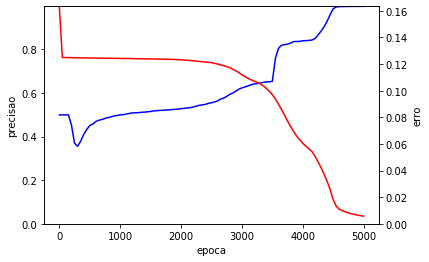

In [21]:
def historico_treino(df):
    resultados = df
    fig, ax1 = plt.subplots()
    max1 = resultados['precisao'].max()
    ax1.set_ylim(0, max1)

    max2 = resultados['erro'].max()
    ax2 =ax1.twinx()
    ax2.set_ylim(0, max2)

    sns.lineplot(ax=ax1, data=resultados, x='epoca', y='precisao', color='blue')
    sns.lineplot(ax=ax2, data=resultados, x='epoca', y='erro', color='red')

    plt.show()
    return(None)

resultados = pd.DataFrame(data=np.array([memoria_epoca,memoria_erro, memoria_precisao]).T,
                          columns=['epoca','erro','precisao'])
historico_treino(resultados)

Vamos gerar agora um grid para realizar previsões e comparar com os  valores observados da variável. A geração do grid ficará a cargo de uma função específica descrita a seguir

In [0]:
def gera_grids(X, borda=0.1, n=40):
    x1_min = np.min(X[:,0]) - borda
    x1_max = np.max(X[:,0]) + borda
    x1 = np.linspace(x1_min, x1_max, n) 
    
    x2_min = np.min(X[:,1]) - borda
    x2_max = np.max(X[:,1]) + borda
    x2 = np.linspace(x2_min, x2_max, n)
    
    grid = np.array(np.meshgrid(x1,x2))
    pares = grid.reshape(2,-1).T
    return(pares, grid)

pares, grid = gera_grids(X.T, borda, n_grid)


Uma vez gerado o grid calculamos os valores previstos para a variável se saida. Observe que estamos interessados nesta etapa no valor contínuo da variável de saida e não na categoria prevista.

In [0]:
def previsoes(neural, X):
    rede = neural
    n = len(rede)
    
    Ai_menos1 = X
    for i in range(n):
        Zi = rede[i]['W'].dot(Ai_menos1) + rede[i]['b']
        Ai = rede[i]['ativ'](Zi)
        Ai_menos1 = Ai
        
    Y_hat = (Ai>0.5)*1
    return(Ai, Y_hat)

A_hat, Y_hat = previsoes(estrutura, pares.T)


Por último, nesta etapa criamos um gráfico estático mostrando a sobreposição dos valores previstos com os grupos observados da variável de saida. Como pode ser observado a rede neural foi capaz de determinar a linha de separação entre os dois grupos.

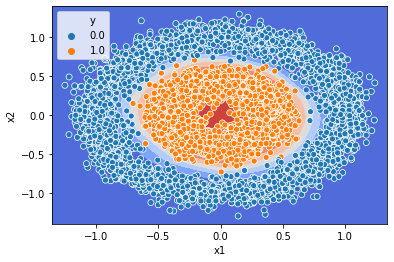

In [24]:
def gera_contorno(X, Y, XX, A):
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots()
    import pandas as pd
    df = pd.DataFrame(data=np.concatenate([X,Y.reshape(-1,1)], axis=1),
                      columns=['x1','x2','y'])
    import seaborn as sns
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', zorder=1)
    ax.contourf(XX[0], XX[1], A.reshape(XX[1].shape),cmap='coolwarm', zorder=-1)
    plt.show()
    
gera_contorno(X.T,Y,grid,A_hat)

A célula a seguir fornece um gráfico animado com a convergência da rede neural durante o treinamento.

In [25]:
#########################################################
# Função para cálculo de valores de probabilidade de    #
#  saida para uma determinada epoca da rede neural, a   #
#  partir de valores de grid(2xn) X1,X2 de entrada      #
#########################################################
def calcula_Y_prob(indice,X_entrada_teste):
    A_anterior = X_entrada_teste
    for i,val in enumerate(memoria[indice]):
        val['Z']= val['W'].dot(A_anterior) + val['b']
        val['A']= val['ativ'](val['Z'])
        A_anterior = val['A']
    return(val['A'])    

#########################################################
# Gráfico de Contorno Animado                           #
#########################################################
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" # "html5" ou "jshtml"
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1,figsize=(10,5))
#axes = plt.gca()
ax.set(xlabel="$X_1$", ylabel="$X_2$")
ax.grid(False)
fig.subplots_adjust(left=0.20)
fig.subplots_adjust(right=0.80)
ax.scatter(X.T[:, 0], X.T[:, 1], c=Y.ravel(), s=40, alpha=0.25,
            cmap=plt.cm.Spectral, edgecolors='black', zorder=1)

Y_prob_calc_teste = calcula_Y_prob(0, grid.reshape(2,-1))
cont = ax.contour(grid[0], grid[1], Y_prob_calc_teste.reshape(grid[0].shape), 
                  levels=[.5], cmap="Greys", vmin=0, vmax=.6, zorder=0)

def animate(epoca):
    global cont
    numero = epoca
    Y_prob_calc_teste = calcula_Y_prob(numero, grid.reshape(2,-1))
    fig.suptitle("Convergência da Rede Neural - epoca = " + 
                                             str(epoca), fontsize=20)
    #f=fill, com cor
    ax.contourf(grid[0], grid[1], Y_prob_calc_teste.reshape(grid[0].shape), 25, 
                 alpha = 1, cmap=plt.cm.Spectral, zorder=-1) 
    
    for c in cont.collections:
      c.remove()
    
    #apenas as linhas 
    cont = ax.contour(grid[0], grid[1], Y_prob_calc_teste.reshape(grid[0].shape), 
                      levels=[.5], cmap="Greys", vmin=0, vmax=.6, zorder=0)

animacao = FuncAnimation(fig, animate, frames=frames)
plt.close()    
animacao



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: No contour levels were found within the data range.


# Rede Neural a partir do Numpy script em uma única célula

0 0.5 0.1633580371905894
250 0.37 0.12477406025726893
500 0.4510909090909091 0.12456751399134686
750 0.48345454545454547 0.12440451058391297
1000 0.49981818181818183 0.12426258702257023
1250 0.5098181818181818 0.12408128287461088
1500 0.5156363636363637 0.12386493938797395
1750 0.5223636363636364 0.12363729220203473
2000 0.5285454545454545 0.12317805573837416
2250 0.54 0.1222601251050805
2500 0.5554545454545454 0.12108130498641118
2750 0.5849090909090909 0.11812722383643744
3000 0.624 0.11194526620880718
3250 0.6434545454545455 0.10626933117488563
3500 0.6541818181818182 0.09698158924838722
3750 0.8245454545454546 0.07718932305257777
4000 0.8398181818181818 0.060630833234199044
4250 0.8663636363636363 0.04662224500800594
4500 0.9872727272727273 0.018080190538623846
4750 0.9976363636363637 0.008187469512729077


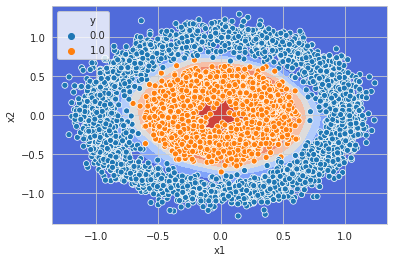

In [26]:
#%%
#########################################################
# Carregamento de bibliotecas - rede neural             #
#########################################################
import numpy as np
from numpy.random import random as rnd
epocas = 5000
suav = 0.1
alpha = 0.2
m = 5500
borda = 0.1
n_grid = 40

#%%
#########################################################
# Geracao de dados de treino                            #
#########################################################
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=m, shuffle=True, 
                    noise=0.1, factor=0.4,
                    random_state=42)
X = X.T
Y = Y.reshape(1,-1)

#%%
#########################################################
# Funcoes de Ativacao e suas derivadas                  #
#########################################################
relu = lambda x: (x>0)*x
drelu = lambda x: (x>0)*1
sig = lambda x: 1/(1+np.exp(-x))
dsig = lambda x: sig(x)*(1-sig(x))       

#%%
#########################################################
# Estrutura da rede neural                              #
#########################################################
estrutura = [{'in':2, 'out':25, 'ativ':relu},
             {'in':25,'out':50, 'ativ':relu},
             {'in':50,'out':50, 'ativ':relu},
             {'in':50,'out':25, 'ativ':relu},
             {'in':25,'out': 1, 'ativ':sig}]

niveis = len(estrutura)

#%%
#########################################################
# Inicialização de pesos. Carregamento de funcoes       #
#########################################################
np.random.seed(42)
for i,val in enumerate(estrutura):
    val['W'] = rnd(val['in']*val['out']).reshape(val['out'],val['in'])*suav
    val['b'] = rnd(val['out']).reshape(val['out'],1)*suav
    if val['ativ']==relu:
        val['dativ']=drelu
    else:
        val['dativ']=dsig

#%%
#########################################################
# Treino                                                #
#########################################################
for epoca in range(epocas):
    #####################################################
	# Forward Pass                                      #
	#####################################################
    A_anterior = X
    for i,val in enumerate(estrutura):
        val['Z']= val['W'].dot(A_anterior) + val['b']
        val['A']= val['ativ'](val['Z'])
        val['dA']=val['dativ'](val['Z'])
        A_anterior = val['A']
    
	#####################################################
	# Erro                                              #
	#####################################################
    erro = np.mean((Y - val['A'])**2)/2
    Y_calc = (val['A']>0.5)*1
    precisao = np.sum(Y == Y_calc)/m
    if epoca % 250 == 0:
        print(epoca, precisao, erro)

    #####################################################
	# Backward Pass                                     #
	#####################################################
    derro_dA = Y - val['A']    
    for i in range(niveis-1,0,-1):
        val = estrutura[i]; delta = alpha/m
        derro_dZ = val['dA'] * derro_dA
        derro_dA = val['W'].T.dot(derro_dZ)
        val['W'] = val['W'] + delta * derro_dZ.dot(estrutura[i-1]['A'].T)
        val['b'] = val['b'] + np.sum(delta * derro_dZ, axis=1).reshape(-1,1)

#%%
#########################################################
# Geracao do grid para previsoes                        #
#########################################################    
def gera_grids(X, borda=0.1, n=40):
    x1_min = np.min(X[:,0]) - borda
    x1_max = np.max(X[:,0]) + borda
    x1 = np.linspace(x1_min, x1_max, n) 
    
    x2_min = np.min(X[:,1]) - borda
    x2_max = np.max(X[:,1]) + borda
    x2 = np.linspace(x2_min, x2_max, n)
    
    grid = np.array(np.meshgrid(x1,x2))
    pares = grid.reshape(2,-1).T
    return(pares, grid)

pares, grid = gera_grids(X.T, borda, n_grid)

#%%
#########################################################
# Previsoes da rede para os pontos do grid              #
#########################################################
def previsoes(neural, X):
    rede = neural
    n = len(rede)
    
    Ai_menos1 = X
    for i in range(n):
        Zi = rede[i]['W'].dot(Ai_menos1) + rede[i]['b']
        Ai = rede[i]['ativ'](Zi)
        Ai_menos1 = Ai
        
    Y_hat = (Ai>0.5)*1
    return(Ai, Y_hat)

A_hat, Y_hat = previsoes(estrutura, pares.T)

#%%
#########################################################
# Grafico estatico                                      #
#########################################################
def gera_contorno(X, Y, XX, A):
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots()
    import pandas as pd
    df = pd.DataFrame(data=np.concatenate([X,Y.reshape(-1,1)], axis=1),
                      columns=['x1','x2','y'])
    import seaborn as sns
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', zorder=1)
    ax.contourf(XX[0], XX[1], A.reshape(XX[1].shape),cmap='coolwarm', zorder=-1)
    plt.show()
    
gera_contorno(X.T,Y,grid,A_hat)


# Rede Neural a partir do Numpy - Implementação por classes

In [0]:
"""
#########################################################
# Funções de ativação e suas derivadas                  #
#########################################################
"""
def sigmoide(Z):
    import numpy as np
    sig = 1/(1 + np.exp(-Z))
    return(sig)
    
def dsigmoide(Z):
    dsig = sigmoide(Z)*(1-sigmoide(Z))
    return(dsig)
    
def relu(Z):
    import numpy as np
    relu = np.maximum(Z,0)
    return(relu)
    
def drelu(Z):
    import numpy as np
    Z = np.array(Z)
    drelu = (Z>0)*1
    return(drelu)
    
    


In [0]:
class circulos:
    """
    Geração de circulos concentricos em um dataframe     
    Metodos: 
      grafico()       - apresenta o gráfico de dispersão 
                        dos pontos de treino
      grid(espessura) - retorna dois arrays 30x30 que 
                        formam um grid de desenho
      length()        - comprimento do dataframe de 
                         treino
      values()        - retorna um dataframe com x1,x2,y
      XY()            - retorna dois arrays, X (com x1 e
                         x2) e Y (com y)
    """
    def __init__(self,elementos=2000,
                      semente=42,
                      ruido=0.2,
                      fator=0.8):
        self.elementos = elementos
        self.semente = semente
        self.ruido = ruido
        self.fator = fator
        
    def values(self):
        from sklearn.datasets import make_circles
        import numpy as np
        import pandas as pd
        x, y = make_circles(n_samples=self.elementos, 
                    shuffle=True, noise=self.ruido, 
                    random_state=self.semente, 
                    factor=self.fator)
        y_2d = y.reshape(-1,1)
        arr = np.concatenate([x,y_2d],axis=1)
        df = pd.DataFrame(data = arr, columns = ["x1","x2","y"])
        return(df)
        
    def XY(self):
        import numpy as np
        df = self.values()
        Y = np.array(df.iloc[:,2]).reshape(1,-1) #( 1 x 2000)
        X = np.array(df.iloc[:,[0,1]]).T         #( 2 x 2000)
        return(X,Y)
    
    def length(self):
        m = len(self.values())
        return (m)
        
    def grafico(self):
        from matplotlib import pyplot as plt
        import seaborn as sns
        df = self.values()
        plt.close()
        graf=sns.scatterplot(data=df, x="x1", y="x2", hue="y")
        plt.show()
        return(graf)


In [0]:
class neural:
    def __init__(self,rede):
        self.rede = rede
        self.n = len(self.rede)
        
    def inicializa(self):
        from numpy import random as rnd
        
        for i in range(1,self.n):
            if self.rede[i]['ativ']==relu:
                self.rede[i]['dativ']=drelu
            elif self.rede[i]['ativ']==sigmoide:
                self.rede[i]['dativ']=dsigmoide
            else:
                print("Função não suportada")
                break
            
            entra = self.rede[i]['in']
            sai = self.rede[i]['out']
            self.rede[i]['W']=rnd.randn(sai,entra)*0.1
            self.rede[i]['b']=rnd.randn(sai,1)*0.1

        return(None)
        
    def forward(self, X, Y):
        import numpy as np
        self.rede[0]['A']=np.array(X)

        for i in range(1,self.n):
            self.rede[i]['Z'] = \
                 self.rede[i]['W'].dot(self.rede[i-1]['A']) + \
                 self.rede[i]['b']
            self.rede[i]['A'] = \
                 self.rede[i]['ativ'](self.rede[i]['Z'])
        
        A = self.rede[self.n-1]['A']
        erro = 1/2*np.sum((A-Y)**2) 
        Y_hat = (A>0.5)*1
        precisao = np.mean(Y_hat==Y)

        return(erro, precisao, A)
        
    def backward(self, X, Y, alpha=0.1):
        """
        dA significa dErro/dA; dZ significa dA/dZ
        dErro/dZ = dA/dZ * dErro/dA (hadamart product)
        Ai = f(Zi); Zi = Wi.A(i-1) + bi
        """
        import numpy as np
        m = len(Y.ravel())
        
        dErro_dAi = (self.rede[self.n-1]['A']-Y)
        dZ_db = np.ones(m).reshape(m,1)

        for i in range(self.n-1,0,-1):
            dAi_dZi = self.rede[i]['dativ'](self.rede[i]['Z'])               
            dErro_dZi = dAi_dZi * dErro_dAi
                
            dErro_dWi = dErro_dZi.dot(self.rede[i-1]['A'].T)
            dErro_dbi = dErro_dZi.dot(dZ_db)
            
            self.rede[i]['W'] = self.rede[i]['W'] - alpha * dErro_dWi/m                              
            self.rede[i]['b'] = self.rede[i]['b'] - alpha * dErro_dbi/m
            
            dErro_dAi = self.rede[i]['W'].T.dot(dErro_dZi)
            
        return(None)

    def treino(self,X,Y,epocas=1000):
        self.inicializa()
        for i in range(epocas+1):
            precisao = self.forward(X,Y)[1]
            if i % 1000 == 0:
              print(precisao)
            self.backward(X,Y,0.1)

    def predict(self, X):
        import numpy as np
        Ai_menos1 = np.array(X)

        for i in range(1,self.n):
            Zi = self.rede[i]['W'].dot(Ai_menos1) + self.rede[i]['b']
            Ai = self.rede[i]['ativ'](Zi)
            Ai_menos1 = Ai
        
        return(Ai)
       
    def contorno(self,X,Y, espessura=0.1):
        import numpy as np
        from matplotlib import pyplot as plt
        import seaborn as sns
        plt.close()
        sns.set_style("whitegrid")
        fig, ax = plt.subplots(1,1,figsize=(10,5))

        #axes = plt.gca()
        ax.set(xlabel="$X_1$", ylabel="$X_2$")
        ax.grid(False)
        fig.subplots_adjust(left=0.20)
        fig.subplots_adjust(right=0.80)

        ax.scatter(X.T[:, 0], X.T[:, 1], c=Y.ravel(), s=40, 
            cmap=plt.cm.Spectral, edgecolors='black', zorder=1)
        
        max_x1 = np.max(X.T[:,0].ravel()) + espessura
        min_x1 = np.min(X.T[:,0].ravel()) - espessura

        max_x2 = np.max(X.T[:,1].ravel()) + espessura
        min_x2 = np.min(X.T[:,1].ravel()) - espessura

        grid = np.mgrid[min_x1:max_x1:30j, min_x2:max_x2:30j]
        grid_2d = grid.reshape(2,-1)
        XX, YY = grid
        
        A = self.predict(grid_2d).ravel()
        
        ax.contourf(XX, YY, A.reshape(XX.shape), 
                  levels=np.linspace(0,1,10), 
                  cmap="coolwarm", vmin=0, vmax=.6, zorder=0)
        plt.show()
        
        return(None)

0.5
0.925
0.9715
0.9215
0.9985


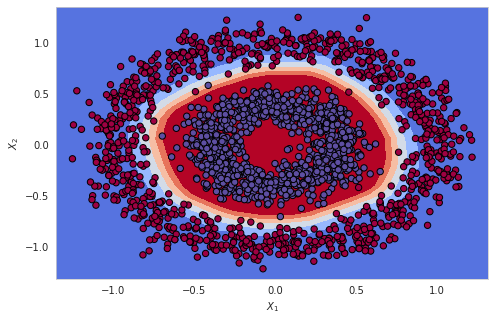

In [30]:
#import sys
#sys.path.append('../')

#import bibliotecas as bb

circ = circulos(elementos=2000, semente=42, 
                   ruido=0.1, fator=0.4)

X, Y = circ.XY()       # valores de treino

rede = [{'out':2},
        {'in': 2, 'out':25, 'ativ':relu},
        {'in':25, 'out':50, 'ativ':relu},
        {'in':50, 'out':50, 'ativ':relu},
        {'in':50, 'out':25, 'ativ':relu},
        {'in':25, 'out': 1, 'ativ':sigmoide}]

net1 = neural(rede)
net1.treino(X,Y,4000)    
net1.contorno(X,Y)

# Resolução de Um Problema de Classificação através do Pacote Keras

**Definição do Problema**

Neste caso vamos encontrar uma curva de separação para o conjunto de dados $x_1, x_2$ obtidos a partir da função ```make_moons```  do pacote scikit-learn.

**Conjunto de Dados de Análise**

O primeiro passo é gerar o conjunto de dados de análise. Neste caso vamos trabalhar com dados em formato de meia lua. Este padrão de dados pode ser gerado diretamente pelo scikit-learn.

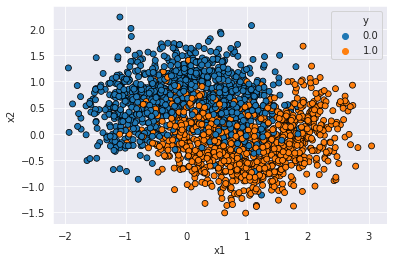

In [31]:
from sklearn.datasets import make_moons 
x, y = make_moons(n_samples = 2000, noise=0.40, random_state=42)

import numpy as np
np.set_printoptions(precision=3)

from matplotlib import pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import pandas as pd
dados = pd.DataFrame(data=np.concatenate([x,y.reshape(-1,1)], axis=1),
                     columns=['x1','x2','y'])

plt.close('all')
sns.scatterplot(data=dados, x='x1', y='x2', hue='y', edgecolor='black');

**Grid de Pontos para Previsão**

Em seguida é gerado um grid de pontos no plano $x_1, x_2$ para que seja possível realizar previsões a partir dos modelos que serão criados. Será gerado tanto um grid (dois conjuntos de dados, cada um com o formato 100x100), quanto uma sequência de pares de pontos $x_1, x_2$ equivalentes ao grid.

In [0]:
import numpy as np
x1_min = dados['x1'].min() - 0.5; x1_max = dados['x1'].max() + 0.5
eixo_x1 = np.linspace(x1_min, x1_max, 100)

x2_min = dados['x2'].min() - 0.5; x2_max = dados['x2'].max() + 0.5
eixo_x2 = np.linspace(x2_min, x2_max, 100)

grid = np.array(np.meshgrid(eixo_x1,eixo_x2)) # (2,100,100)
xx, yy = grid
grid_2d = grid.reshape(2, -1).T # (10.000,2)

**Divisão dos dados em grupo de treino e de teste**

In [0]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = \
                    train_test_split(x,y, random_state=42, test_size=0.10)

import pandas as pd
treino = pd.DataFrame(data = np.concatenate([x_treino, y_treino.reshape(-1,1)],
                                             axis = 1), columns=['x1','x2','y'])

teste = pd.DataFrame(data = np.concatenate([x_teste, y_teste.reshape(-1,1)],
                                             axis = 1), columns=['x1','x2','y'])

**Funções de ativação típicas e suas derivadas em uma rede neural**

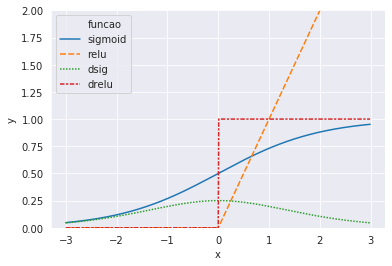

In [34]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.facecolor"] = "w"

x = np.arange(-3, 3, 0.01)
y = np.array([1/(1 + np.exp(-x)),  x * (x > 0)]).T
yL = np.array([y[:,0]*(1-y[:,0]), 1 * (x > 0)]).T

funcoes = pd.DataFrame(data = np.concatenate([x.reshape(-1,1),y,yL],axis=1),
                     columns = ['x','sigmoid','relu','dsig','drelu'])

funcoes2 = pd.melt(funcoes, id_vars = ['x'], 
                        value_vars = ['sigmoid','relu','dsig','drelu'],
                        var_name = 'funcao', value_name = 'y')

plt.close('all')
sns.lineplot(data=funcoes2, x='x', y='y', hue='funcao', style='funcao').set_ylim([0,2]);

**Criação e Compilação do modelo através do pacote keras**

A seguir é apresentado o modelo da rede neural a ser utilizada neste exemplo. O gráfico correspondente pode gerado a partir do site: http://alexlenail.me/NN-SVG/index.html. O modelo é composto de 2 neurons de entrada, seguidos de camadas totalmente conectadas com 4, 6, 6, 4 neurons e uma camada de saida com 1 neuron. As funções de ativação utilizadas são a Relu para todos os níveis à exceção do de saida o qual irá funcionar com a sigmóide.

Os comandos são auto explicativos. 

1   `Sequential()` irá criar um modelo em cascata (sequencial) para a rede neural. 

2  O comando seguinte `model.add` é explicado em detalhes a seguir: 
*   `model.add` adiciona uma camada (*layer*) ao modelo.
*   `model.add(Dense(` Indica que o nível a ser adicionado é totalmente conectado (denso)
*   `model.add(Dense(4,` Indica que o nível a ser adicionado terá quatro células. Observe que este NÃO é o nível de entrada. O nível de entrada é chamado de nível 0
*   `model.add(Dense(4, input_dim=2,` Indica que deverá ser adicionado um nível de entrada (nível 0) com duas células e uma primeira camada interna (nível 1) com quatro células.
*   `model.add(Dense(4, input_dim=2, activation='relu'))` Este é o comando completo. Adicionar um nível de entrada (nível 0) com duas células, um nível intermediário (nível 1) com quatro células, sendo as células do nível intermediário ativadas através da função `relu`.

3  Os comandos `model.add(Dense(n, activation='relu'))` a seguir vão criando camadas intermediárias, com *n* células totalmente conectadas, em cascata, cada uma delas com a função de ativação `relu`. Eles formam a estrutura de *deep learning* da rede. Teremos portanto:
*   `model.add(Dense(6, activation='relu'))` : segundo nível interno (nível 2) com seis células, totalmente conectadas ao primeiro nível interno, função de ativação `relu` 
*   `model.add(Dense(6, activation='relu'))` : terceiro nível interno (nível 3) com seis células, totalmente conectadas ao segundo nível interno, função de ativação `relu` 
*   `model.add(Dense(4, activation='relu'))` : quarto nível interno (nível 4) com quatro células, totalmente conectadas ao terceiro nível interno, função de ativação `relul`

4  O último nível, também chamado de nível de saída (nível 5 neste caso) será adicionado como qualquer outro nível interno através do comando mostrado a seguir. Observe que escolhemos para função de ativação deste nível não a função `relu` mas sim a `sigmóide`, para termos um sinal de saida contínuo. O comando é:
*   `model.add(Dense(1, activation='sigmoid'))`

5  Por último o modelo é compilado, isto é preparado para o treino e para a execução de suas funções de classificação 

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adamax', 
              metrics=['accuracy'])

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Treino do Modelo**

Geração dos Dados de Aprendizado e Desempenho. Primeiro inicializamos o tensor para armazenamento do histórico das previsões para a  probabilidade 

Lembrando: 
- loss: a função custo a ser minimizada. log-likelihood em uma rede de  classificação e MSE em uma rede de regressão.
- accuracy: percentual de acertos no conjunto em análise (treino ou teste).

A célula a seguir apresenta a função a ser executada ao final de cada época de treino do modelo keras. Neste exemplo a função a ser executada chama-se ```salva_epoca```. As funções executadas durante o treino recebem por default o número da época e o log de status de treino. 

O log de status do treino é um dicionário python de nome ```logs``` com quatro chaves ```val_loss```, ```val_acc```, ```loss``` e ```acc```, as quais fornecem o valor da função de erro (```val_loss``` e ```loss```) e da precisão (```val_acc``` e ```acc```) para os conjuntos de validação e treino para cada época do treino.

No caso da ```salva_epoca``` ela calcula as probabilidades dos pontos no array grid_2d terem y=1 e em seguida salva este bloco de valores na posição final do array dados_probs.

E por último executamos o treino do modelo com os valores de $x_1, x_2$ e $y$,  através da biblioteca keras

Treino e gravação do histórico 

In [36]:
dados_probs = []
dados_results = []
np.random.seed(42)

def salva_epoca(epoca, logs, grid_2d = grid_2d, 
                dados_probs = dados_probs, dados_results = dados_results):
    probs_previstas = model.predict_proba(grid_2d, batch_size=32, verbose=0).ravel()
    dados_probs.append(probs_previstas)
    valores = [logs['val_loss'], logs['val_acc'], logs['loss'], logs['acc']]
    dados_results.append(valores)
    return(dados_probs, dados_results)
  
historico = keras.callbacks.LambdaCallback(on_epoch_end=salva_epoca)

n_epocas = 200 #define o comprimento de dados_probs (épocas de treino)
n_quadros = n_epocas # n_quadros <= n_epocas (quadros de animação)
x = np.array(treino[['x1','x2']])
y = np.array(treino['y'])
historia = model.fit(x, y, epochs=n_epocas, validation_split=0.2, 
                     verbose=0, callbacks=[historico])

dados_results = pd.DataFrame(data=np.array(dados_results),
                             columns=['val_loss','val_acc','loss','acc'])

**Evolução da Precisão no Conjunto de Treino e Teste**

In [0]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" #ou "jshtml"

In [38]:
plt.close('all')
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Época'); ax.set_ylabel('Precisão')
ax.legend(['Treino', 'Validação'])

# n_epocas definido na célula anterior
ax.set_xlim(0,n_epocas); ax.set_ylim(0.8,0.9)

# n_quadros definido em célula anterior
def animate2(k, n_epocas = n_epocas, n_quadros = n_quadros, ax=ax):
  i = int((k)*n_epocas/n_quadros)
  ax.set_title('Precisão do Modelo - época: ' + str(i))
  ax.plot(dados_results['acc'].iloc[:i], c="blue")
  ax.plot(dados_results['val_acc'].iloc[:i], c="red")

animacao2 = FuncAnimation(fig, animate2, frames=n_quadros, repeat=False) 
plt.close()

# Resultados finais
print(np.round(dados_results['acc'].iloc[-1],2), 
      np.round(dados_results['val_acc'].iloc[-1],2))
animacao2


0.87 0.86


**Animação gráfica com a evolução do treino da rede neural**

In [39]:
plt.close('all')
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

def animate1(k, treino = treino, dados_probs = dados_probs,
            eixo_x1 = eixo_x1, eixo_x2 = eixo_x2, 
            n_quadros = n_quadros, n_epocas = n_epocas, ax1 = ax1):
    
    ax1.cla()    
    i = int((k)*n_epocas/n_quadros)
    array = dados_probs[i].reshape(100,100)
    ax1.contourf(eixo_x1, eixo_x2, array, alpha=0.9, cmap=plt.cm.Spectral)
    sns.scatterplot(data=treino, x='x1', y='x2', hue='y', legend=False, ax=ax1, edgecolor='black', alpha=0.5)
    ax1.set_title("Aprendizado do Modelo Keras. Época = " + str(i+1))
    return(ax1)

animacao1 = FuncAnimation(fig, animate1, frames=n_quadros, repeat = False, interval = 1000)
plt.close()
animacao1

# Análise do Sobreajuste (*overfitting*)

Iremos avaliar os mapas de contorno (i.e.resultados) obtidos pelos mesmos dados iniciais quando analisados por três modelos:
- rede neural sem normalização: o mesmo modelo do exercício anterior
- rede neural com normalização: mesma estrutura do modelo anterior, com duas camadas normalizadas
- regressão logística.

Para otimizar o trabalho é apresentada a seguir uma função que recebe os dados de treino e as previsões de um modelo e desenha os gráficos de dispersão e contorno correspondentes.

In [0]:
def desenha_contorno(xx, yy, x, y, preds, plot_name, limites, tamanho):
  fig, ax = plt.subplots(1,1,figsize=(tamanho[0],tamanho[1]))
  
  ax.set_xlim([limites[0],limites[1]])
  ax.set_ylim([limites[2],limites[3]])
  ax.set(xlabel="$X_1$", ylabel="$X_2$")
  ax.set_title(plot_name, fontsize=12)
  
  ax.contourf(xx, yy, preds.reshape(xx.shape), 25, alpha = 0.6, cmap=plt.cm.Spectral)
  ax.contour(xx, yy, preds.reshape(xx.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
  ax.scatter(x[:, 0], x[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
  plt.show()

**Rede Neural sem Normalização**

Mapa de aprendizado

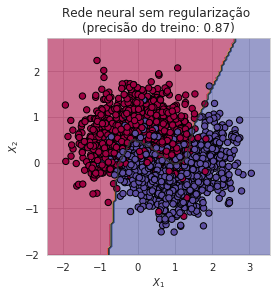

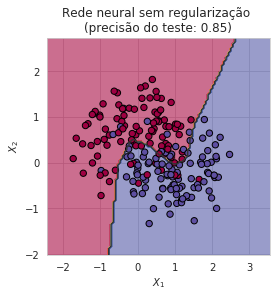

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" #ou "jshtml"
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score

preds = model.predict_classes(grid_2d)
limites = [x1_min,x1_max,x2_min,x2_max]
tamanho = [4,4]

nn1_treino = model.predict_classes(x_treino)
treino_acc = accuracy_score(y_treino, nn1_treino)

nn1_teste = model.predict_classes(x_teste)
teste_acc = accuracy_score(y_teste, nn1_teste)


title = "Rede neural sem regularização \n(precisão do treino: {0:.2f})".format(treino_acc)
desenha_contorno(xx, yy, x_treino, y_treino, preds, title, limites, tamanho)

title = "Rede neural sem regularização \n(precisão do teste: {0:.2f})".format(teste_acc)
desenha_contorno(xx, yy, x_teste, y_teste, preds, title, limites, tamanho)

**Rede Neural com regularização**

Criação do modelo

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

Treino

In [0]:
dados_probs = []
dados_results = []
np.random.seed(42)

# n_quadros definido em célula anterior
def salva_epoca(epoca, logs, grid_2d = grid_2d, 
                dados_probs = dados_probs, dados_results = dados_results):
    probs_previstas = model.predict_proba(grid_2d, batch_size=32, verbose=0).ravel()
    dados_probs.append(probs_previstas)
    valores = [logs['val_loss'], logs['val_acc'], logs['loss'], logs['acc']]
    dados_results.append(valores)
    return(dados_probs, dados_results)

historico = keras.callbacks.LambdaCallback(on_epoch_end=salva_epoca)

# n_epocas e n_quadros definidos no modelo anterior

history = model.fit(x_treino, y_treino, epochs=n_epocas, validation_split=0.2, \
                    verbose=0, callbacks=[historico])

nn2_treino = model.predict_classes(x_treino)
treino_acc = accuracy_score(y_treino, nn2_treino)

nn2_teste = model.predict_classes(x_teste)
teste_acc = accuracy_score(y_teste, nn2_teste)

import pandas as pd
dados_results = pd.DataFrame(data=np.array(dados_results),
                             columns=['val_loss','val_acc','loss','acc'])

Mapa de Aprendizado

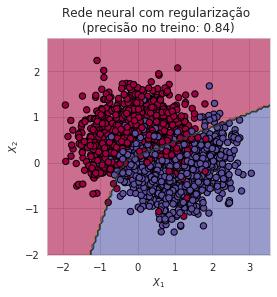

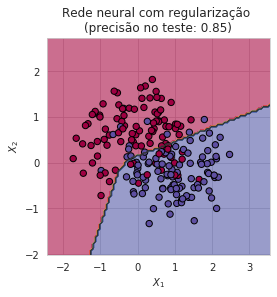

In [44]:
preds = model.predict_classes(grid_2d)
limites = [x1_min,x1_max,x2_min,x2_max]
tamanho = [4,4]

title = "Rede neural com regularização \n(precisão no treino: {0:.2f})".format(treino_acc)
desenha_contorno(xx, yy, x_treino, y_treino, preds, title, limites, tamanho)

title = "Rede neural com regularização \n(precisão no teste: {0:.2f})".format(teste_acc)
desenha_contorno(xx, yy, x_teste, y_teste, preds, title, limites, tamanho)

**Regressão Logística**

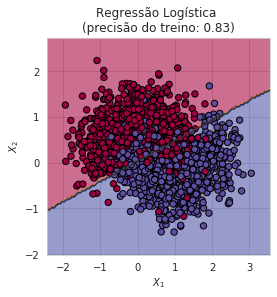

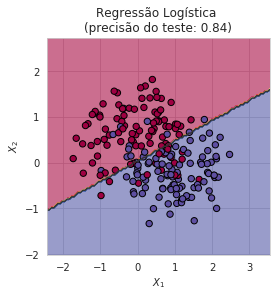

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

regressor = LogisticRegression(solver='lbfgs')
regressor.fit(x_treino, y_treino)

log_treino = regressor.predict(x_treino)
log_teste = regressor.predict(x_teste)

treino_acc = accuracy_score(y_treino, log_treino)
teste_acc = accuracy_score(y_teste, log_teste)

preds = regressor.predict(grid_2d)
limites = [x1_min,x1_max,x2_min,x2_max]
tamanho = [4,4]

title = "Regressão Logística \n(precisão do treino: {0:.2f})".format(treino_acc)
desenha_contorno(xx, yy, x_treino, y_treino, preds, title, limites, tamanho)

title = "Regressão Logística \n(precisão do teste: {0:.2f})".format(teste_acc)
desenha_contorno(xx, yy, x_teste, y_teste, preds, title, limites, tamanho)

# Efeito da taxa de aprendizado na otimização da rede neural
---

**Bibliotecas matemáticas, gráficas e de animação**

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" # "html5" ou "jshtml"

**Simulação do caminho da otimização**

In [0]:
def find_optimization_path(tf_function, init_point, iterations, learning_rate):
    x, y = [tf.Variable(initial_value=p, dtype=tf.float32) for p in init_point]
    function = tf_function(x, y)
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(function)
    x_list, y_list, cost_list = [], [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for t in range(iterations):
            x_, y_, function_ = sess.run([x, y, function])
            x_list.append(x_); y_list.append(y_); cost_list.append(function_)
            result, _ = sess.run([function, train_op])
            
    return x_list, y_list, cost_list

**Função para inicialização do gráfico**

In [0]:
def create_blank_chart_with_styling(plot_size):
    plt.style.use('dark_background')
    fig = plt.figure(figsize=plot_size)    
    ax = Axes3D(fig) # gráficos em 3D

    # Eixos transparentes  
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Nomes dos eixos
    ax.set(xlabel="$x$", ylabel="$y$")
    tf_fun = lambda x, y: 3*(1-x)**2*tf.exp(-(x**2) - (y+1)**2) \
                          - 10*(x/5 - x**3 - y**5)*tf.exp(-x**2-y**2) \
                          - 1/3*tf.exp(-(x+1)**2 - y**2)   
    return (fig, ax)

**Parâmetros Gerais da Animação**

In [0]:
tf_function = lambda x, y: 3*(1-x)**2*tf.exp(-(x**2) - (y+1)**2) \
                           - 10*(x/5 - x**3 - y**5)*tf.exp(-x**2-y**2) \
                           - 1/3*tf.exp(-(x+1)**2 - y**2)   

np_function = lambda x, y: 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) \
                           - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) \
                           - 1/3*np.exp(-(x+1)**2 - y**2)   

init_point = [0,-1]
iterations = 180


**Função para Animação**

In [0]:
def funcao_grafico_e_animacao(plot_name, learning_rate, frames):
  x_list, y_list, cost_list = find_optimization_path(tf_function, init_point, iterations, learning_rate)
  a3D, b3D = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
  cost3D = np.array([np_function(x_, y_) for x_, y_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
  
  fig, ax = create_blank_chart_with_styling((6, 6))
  ax.plot_surface(a3D, b3D, cost3D, rstride=4, cstride=4, cmap=plt.get_cmap('rainbow'), alpha=0.5, 
                  linewidth=0.2, antialiased=True)
  ax.set_title(plot_name, fontsize=20)
  ax.plot(x_list[:0], y_list[:0], zs=cost_list[:0], zdir='z', c='r', lw=2)
  
  def animate(angle):
    # gráfico 3D com o gradient descent
    if angle < 10:
      ax.plot(x_list[:angle], y_list[:angle], zs=cost_list[:angle], zdir='z', c='r', lw=2)
    else:
      ax.plot(x_list[angle-10:angle], y_list[angle-10:angle], zs=cost_list[angle-10:angle], zdir='z', c='r', lw=2)

    # rotação do gráfico
    ax.view_init(30, 225 + angle*2)
  animation = FuncAnimation(fig, animate, frames = frames)
  plt.close()
  return(animation)


**Gráfico com taxa de aprendizado alta**

In [51]:
from matplotlib.animation import FuncAnimation
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" # "html5" ou "jshtml"

plot_name = "Taxa de Aprendizado Alta"
learning_rate = 0.15
funcao_grafico_e_animacao(plot_name, learning_rate, 180)

Output hidden; open in https://colab.research.google.com to view.

**Gráfico com taxa de aprendizado baixa**

In [52]:
plot_name = "Taxa de Aprendizado Baixa"
learning_rate = 0.015
funcao_grafico_e_animacao(plot_name, learning_rate, 180)

Output hidden; open in https://colab.research.google.com to view.